In [188]:
import pandas as pd

data = pd.read_csv("diabetes.csv")

print("Data Size:",len(data))

data.describe()

Data Size: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [189]:
feature_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

total_cnt = data['Glucose'].count()

for feature in feature_list :
    cnt = data[data[feature] == 0][feature].count()
    print('{0} 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, cnt, 100 * cnt / total_cnt))

Glucose 건수는 5, 퍼센트는 0.65 %
BloodPressure 건수는 35, 퍼센트는 4.56 %
SkinThickness 건수는 227, 퍼센트는 29.56 %
Insulin 건수는 374, 퍼센트는 48.70 %
BMI 건수는 11, 퍼센트는 1.43 %


In [190]:
data[feature_list] = data[feature_list].replace(0, data[feature_list].median(axis = 0))

In [191]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [192]:
X = data[data.columns[:-1]]
y = data['Outcome']

In [193]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [194]:
import numpy as np
from sklearn.svm import OneClassSVM

clf = OneClassSVM(nu=0.092, max_iter=100000).fit(X_scaled)
outlier = clf.predict(X_scaled)
pd.Series(clf.predict(X_scaled)).value_counts()

 1    694
-1     74
dtype: int64

In [195]:
data['outlier'] = outlier

In [196]:
normal_data = data.loc[data['outlier'] == 1]

In [197]:
normal_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
0,6,148,72,35,30.5,33.6,0.627,50,1,1
1,1,85,66,29,30.5,26.6,0.351,31,0,1
2,8,183,64,23,30.5,23.3,0.672,32,1,1
3,1,89,66,23,94.0,28.1,0.167,21,0,1
5,5,116,74,23,30.5,25.6,0.201,30,0,1


In [198]:
X = normal_data[data.columns[:-2]]
y = normal_data['Outcome']

In [199]:
normal_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'outlier'],
      dtype='object')

In [200]:
health_data = normal_data.loc[normal_data['Outcome'] == 0]
health_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
1,1,85,66,29,30.5,26.6,0.351,31,0,1
3,1,89,66,23,94.0,28.1,0.167,21,0,1
5,5,116,74,23,30.5,25.6,0.201,30,0,1
7,10,115,72,23,30.5,35.3,0.134,29,0,1
10,4,110,92,23,30.5,37.6,0.191,30,0,1


In [201]:
diabetes_data = normal_data.loc[normal_data['Outcome'] == 1]
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
0,6,148,72,35,30.5,33.6,0.627,50,1,1
2,8,183,64,23,30.5,23.3,0.672,32,1,1
6,3,78,50,32,88.0,31.0,0.248,26,1,1
9,8,125,96,23,30.5,32.0,0.232,54,1,1
11,10,168,74,23,30.5,38.0,0.537,34,1,1


In [202]:
X_health = health_data[health_data.columns[:-2]]
y_health = health_data['Outcome']

In [203]:
X_diabete = diabetes_data[diabetes_data.columns[:-2]]
y_diabete = diabetes_data['Outcome']

In [204]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [205]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.684457,0.982444,-0.004390,0.986790,-0.664320,0.236876,0.651930,1.564969
1,-0.877059,-1.232272,-0.558308,0.257728,-0.664320,-0.881330,-0.343164,-0.147394
2,1.309064,2.212841,-0.742947,-0.471334,-0.664320,-1.408484,0.814174,-0.057269
3,-0.877059,-1.091655,-0.558308,-0.471334,0.096647,-0.641714,-1.006559,-1.048637
4,0.372154,-0.142491,0.180250,-0.471334,-0.664320,-1.041073,-0.883975,-0.237518


In [206]:
X_columns = normal_data.columns[:-2]

In [207]:
df_health = normal_data.loc[normal_data['Outcome'] == 0, X_columns]

In [208]:
df_diabete = normal_data.loc[normal_data['Outcome'] == 1, X_columns]

In [209]:
mean_data = pd.concat([df_health.mean(), df_diabete.mean()], axis = 1)
mean_data.columns = ['normal', 'diabetes']

print(mean_data)

                              normal    diabetes
Pregnancies                 3.295896    4.835498
Glucose                   110.535637  139.129870
BloodPressure              70.669546   74.809524
SkinThickness              25.941685   28.757576
Insulin                    79.899568   98.032468
BMI                        30.823326   34.710390
DiabetesPedigreeFunction    0.411568    0.515554
Age                        30.622030   36.670996


In [210]:
from scipy import stats
for col in X_columns:
    print(col)
    print(stats.levene(X_health[col], X_diabete[col]))
    print(stats.fligner(X_health[col], X_diabete[col]))
    print(stats.bartlett(X_health[col], X_diabete[col]))
    print()

Pregnancies
LeveneResult(statistic=16.604330606721362, pvalue=5.138204728270249e-05)
FlignerResult(statistic=19.799972714564966, pvalue=8.59839040654289e-06)
BartlettResult(statistic=12.868588436909024, pvalue=0.00033414355174289813)

Glucose
LeveneResult(statistic=18.045608181577776, pvalue=2.4519127284581445e-05)
FlignerResult(statistic=18.87752750285506, pvalue=1.3938504098635098e-05)
BartlettResult(statistic=10.166549749643938, pvalue=0.0014301165249755953)

BloodPressure
LeveneResult(statistic=0.7598771585302856, pvalue=0.3836692982609614)
FlignerResult(statistic=0.7484314498061979, pvalue=0.38697329786946133)
BartlettResult(statistic=0.439671104538086, pvalue=0.5072812419107161)

SkinThickness
LeveneResult(statistic=0.6390488190615434, pvalue=0.4243297481866194)
FlignerResult(statistic=1.2572517250899278, pvalue=0.2621719433039008)
BartlettResult(statistic=1.1494471689999513, pvalue=0.2836649063985426)

Insulin
LeveneResult(statistic=7.842466174613752, pvalue=0.005245680777899924

In [211]:
# 등분산 검정할 때, LeveneResult의 결과에서 p-value가 0.05 이상이면 등분산성을 갖는 것으로 판단됩니다.

# 등분산성 검정 결과, 3개를 제외한 5개의 feature(Pregnancies, Glucose, BloodPressure, SkinThickness, Age)가 0.05이상의 값을 가지므로 등분산성을 가지는 것으로 판단 할 수 있습니다.

In [212]:
import scipy.stats

result = scipy.stats.ttest_ind(X_health, X_diabete, equal_var = True)
pd.DataFrame(result.pvalue, index = X_columns, columns = ['p_value'])

,p_value
Pregnancies,1.570769e-09
Glucose,4.192734e-40
BloodPressure,1.794810e-06
SkinThickness,1.973049e-05
Insulin,6.937566e-03
BMI,3.623941e-15
DiabetesPedigreeFunction,2.831040e-06
Age,6.369697e-12


In [213]:
# p_value가 0.05보다 작으므로 두 집단간의 평균 차이는 통계적으로 유의미합니다.

In [214]:
pd.DataFrame(result.statistic, index = X_columns, columns = ['t_value'])

,t_value
Pregnancies,-6.119549
Glucose,-14.148866
BloodPressure,-4.816628
SkinThickness,-4.297729
Insulin,-2.707934
BMI,-8.049551
DiabetesPedigreeFunction,-4.721782
Age,-6.992605


<AxesSubplot:title={'center':'Health Correlation of Features'}>

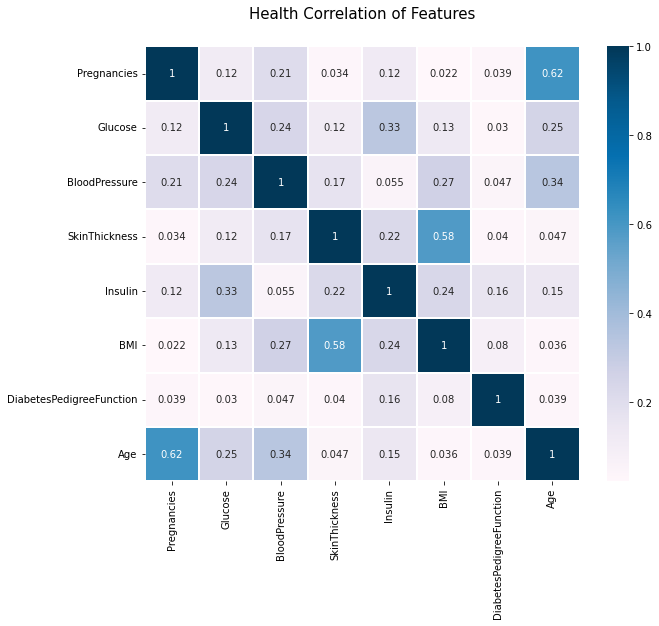

In [215]:
import matplotlib.pyplot as plt 
import seaborn as sns

corr_df = X_health.astype(float).corr().abs()
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Health Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(corr_df, linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True)

<AxesSubplot:title={'center':'Diabete Correlation of Features'}>

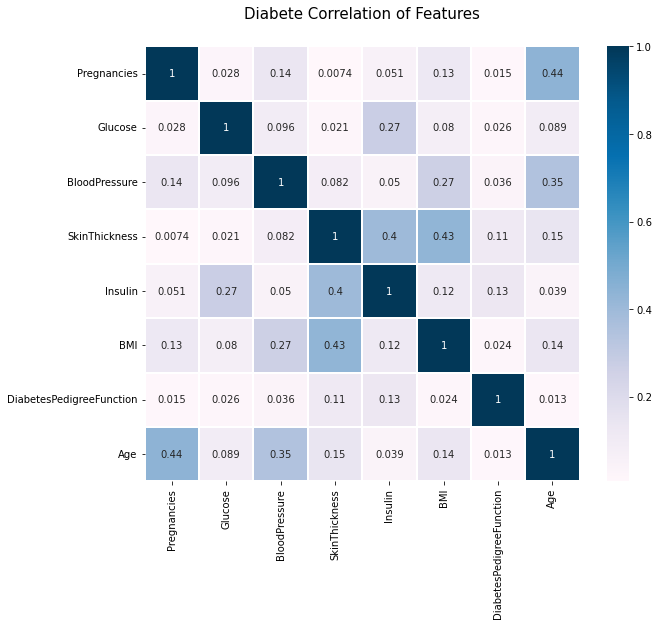

In [216]:
import matplotlib.pyplot as plt 
import seaborn as sns

corr_df = X_diabete.astype(float).corr().abs()
colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Diabete Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(corr_df, linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True)

In [217]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(df_diabete)
chi_square_value, p_value

(249.74807371072458, 1.8838798949904965e-37)

In [218]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df_diabete)
kmo_model

0.4939860513232419

In [219]:
from factor_analyzer import FactorAnalyzer

fa_diabete = FactorAnalyzer(n_factors = 3, method = "principal", rotation = "varimax")
fa_diabete.fit(df_diabete)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [220]:
fa_diabete.loadings_

array([[-0.11565798,  0.69805515,  0.02517649],
       [-0.11105328,  0.14727716,  0.70047361],
       [ 0.4940783 ,  0.62743305, -0.09828985],
       [ 0.71807865, -0.13799267,  0.32768053],
       [ 0.18343755, -0.1213924 ,  0.83172359],
       [ 0.84402542, -0.05828565,  0.02313509],
       [ 0.13643526,  0.00352871,  0.22817327],
       [-0.1351649 ,  0.84967672,  0.06330194]])

In [221]:
efa_diabete_result= pd.DataFrame(fa_diabete.loadings_, index = df_diabete.columns)
efa_diabete_result

,0,1,2
Pregnancies,-0.115658,0.698055,0.025176
Glucose,-0.111053,0.147277,0.700474
BloodPressure,0.494078,0.627433,-0.098290
SkinThickness,0.718079,-0.137993,0.327681
Insulin,0.183438,-0.121392,0.831724
BMI,0.844025,-0.058286,0.023135
DiabetesPedigreeFunction,0.136435,0.003529,0.228173
Age,-0.135165,0.849677,0.063302


<AxesSubplot:title={'center':'Diabete Factor Analysis'}>

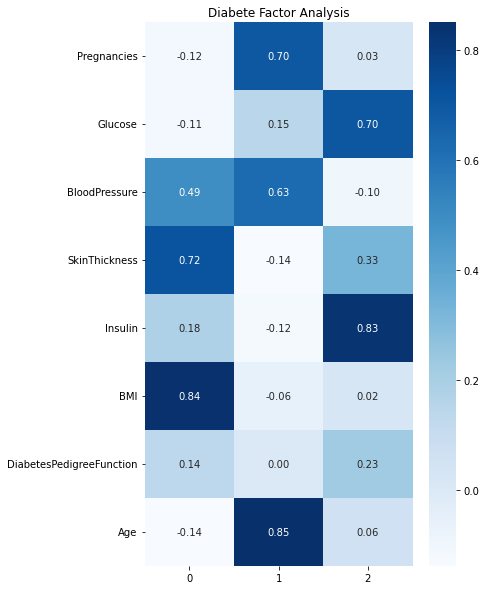

In [222]:
import seaborn as sns

plt.figure(figsize = (6, 10))
plt.title('Diabete Factor Analysis' )
sns.heatmap(efa_diabete_result, cmap = "Blues",  annot = True, fmt = '.2f')

In [223]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

chi_square_value,p_value = calculate_bartlett_sphericity(df_health)
chi_square_value, p_value

(695.8784438728003, 1.42451481081293e-128)

In [224]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(df_health)
kmo_model

0.5658875162130433

In [225]:
from factor_analyzer import FactorAnalyzer

fa_health = FactorAnalyzer(n_factors = 3, method = "principal", rotation = "varimax")
fa_health.fit(df_health)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [226]:
fa_health.loadings_

array([[-0.04368443,  0.80536477, -0.05680028],
       [ 0.098706  ,  0.37359565,  0.67755395],
       [ 0.39803645,  0.54983278, -0.05434343],
       [ 0.8496975 ,  0.0130258 ,  0.06594751],
       [ 0.24821817, -0.218274  ,  0.76822927],
       [ 0.87181253,  0.0334154 ,  0.0974035 ],
       [-0.06173779, -0.05076639,  0.52615656],
       [-0.02436744,  0.88188068,  0.04647584]])

In [227]:
efa_health_result= pd.DataFrame(fa_health.loadings_, index = df_health.columns)
efa_health_result

,0,1,2
Pregnancies,-0.043684,0.805365,-0.056800
Glucose,0.098706,0.373596,0.677554
BloodPressure,0.398036,0.549833,-0.054343
SkinThickness,0.849698,0.013026,0.065948
Insulin,0.248218,-0.218274,0.768229
BMI,0.871813,0.033415,0.097403
DiabetesPedigreeFunction,-0.061738,-0.050766,0.526157
Age,-0.024367,0.881881,0.046476


<AxesSubplot:title={'center':'Health Factor Analysis'}>

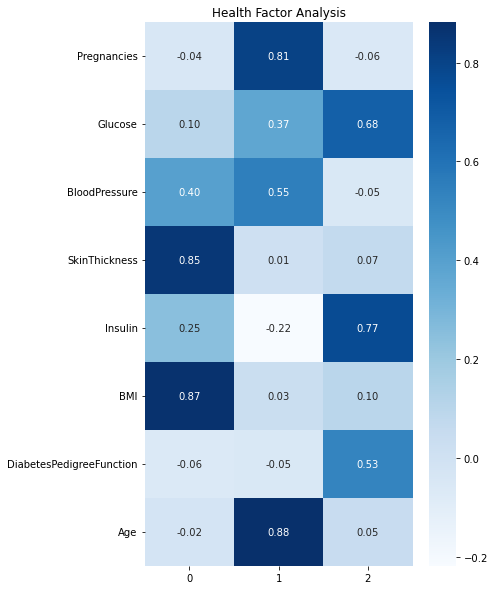

In [228]:
plt.figure(figsize = (6, 10))
plt.title('Health Factor Analysis')
sns.heatmap(efa_health_result, cmap = "Blues", annot = True, fmt = '.2f')

### Train / Test Split

In [229]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### Decision Tree / Gini

In [230]:
# Decision Tree / Gini

from sklearn.tree import DecisionTreeClassifier

dtg_clf = DecisionTreeClassifier(random_state = 42, criterion = 'gini', max_depth = 3)
dtg_clf.fit(X_train, y_train)
dtg_pred = dtg_clf.predict(X_test)
print("train score :", dtg_clf.score(X_train, y_train))
print("test score :", dtg_clf.score(X_test, y_test))
gini = dtg_clf.feature_importances_

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dtg_clf, X_scaled, y, cv = 5)
print("cross validation score :", scores)
print("mean score :", scores.mean())

train score : 0.7546391752577319
test score : 0.7464114832535885
cross validation score : [0.69784173 0.74820144 0.74100719 0.74820144 0.7173913 ]
mean score : 0.7305286205817954


In [231]:
from sklearn.metrics import roc_curve

pred_proba_class_dtg = dtg_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class_dtg)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_dtg)

dtg_thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index' : dtg_thr_index,
              'FPR' : fprs[dtg_thr_index],
              'TPR' : tprs[dtg_thr_index]})

[0.21649485 0.4893617  0.21649485 0.21649485 0.4893617  0.88135593
 0.4893617  0.21649485 0.4893617  0.88135593 0.         0.88135593
 0.4893617  0.         0.21649485 0.4893617  0.21649485 0.21649485
 0.4893617  0.4893617  0.4893617  0.21649485 0.4893617  0.
 0.         0.4893617  0.21649485 0.4893617  0.88135593 0.21649485
 0.21649485 0.4893617  0.21649485 0.21649485 0.         0.4893617
 0.88135593 0.4893617  0.4893617  0.21649485 0.         0.
 0.21649485 0.         0.21649485 0.21649485 0.4893617  0.4893617
 0.4893617  0.21649485 0.21649485 0.21649485 0.21649485 0.4893617
 0.21649485 0.21649485 0.21649485 0.21649485 0.4893617  0.4893617
 0.4893617  0.         0.4893617  0.21649485 0.21649485 0.21649485
 0.88135593 0.4893617  0.88135593 0.4893617  0.21649485 0.88135593
 0.21649485 0.         0.         0.         0.         0.4893617
 0.21649485 0.4893617  0.21649485 0.21649485 0.         0.21649485
 0.4893617  0.88135593 0.21649485 0.4893617  0.         0.
 0.21649485 0.21649485 0

,index,FPR,TPR
0,1,0.034965,0.272727
1,2,0.272727,0.757576
2,3,0.699301,0.939394
3,4,0.720280,0.939394
4,5,1.000000,1.000000


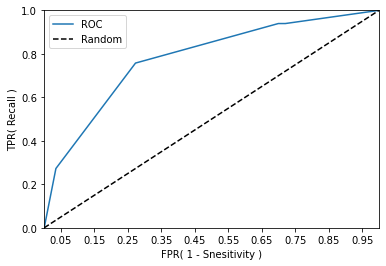

In [232]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_class_dtg):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_dtg)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_dtg)

In [233]:
from sklearn.metrics import roc_auc_score

pred_proba_dtg = dtg_clf.predict_proba(X_test)[:, 1]
dtg_roc_score = roc_auc_score(y_test, pred_proba_dtg)
print('ROC AUC Score : ', dtg_roc_score)

ROC AUC Score :  0.7801440983259165


In [234]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, dtg_pred = None, pred_proba_dtg = None):
    confusion = confusion_matrix(y_test, dtg_pred)
    accuracy = accuracy_score(y_test, dtg_pred)
    precision = precision_score(y_test, dtg_pred)
    recall = recall_score(y_test, dtg_pred)
    f1 = f1_score(y_test, dtg_pred)
    roc_auc = roc_auc_score(y_test, dtg_pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_class_dtg, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_class_dtg)
        custom_predict = binarizer.transform(pred_proba_class_dtg)
        print(f'임곗값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_class_dtg):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_dtg)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0 : threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0 : threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

get_clf_eval(y_test, dtg_pred, pred_proba_dtg)

오차행렬
[[138   5]
 [ 48  18]]
정확도 : 0.7464, 정밀도 : 0.7826, 재현율 : 0.2727, F1 : 0.4045, AUC : 0.6189


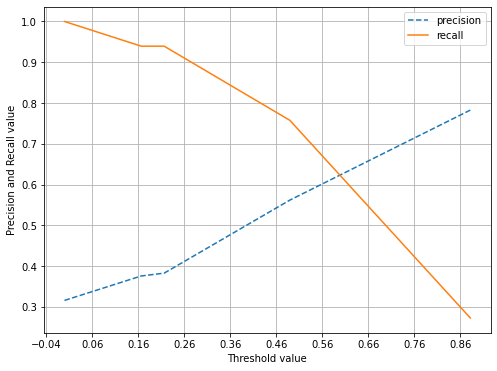

In [235]:
pred_proba_class_dtg = dtg_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_class_dtg)

### Decision Tree / Entropy

In [236]:
# Decision Tree / Entropy

from sklearn.tree import DecisionTreeClassifier

dte_clf = DecisionTreeClassifier(random_state = 42, criterion = 'entropy', max_depth = 3)
dte_clf.fit(X_train, y_train)
dte_pred = dte_clf.predict(X_test)
print("train score :", dte_clf.score(X_train, y_train))
print("test score :", dte_clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score

entropy = dte_clf.feature_importances_
scores = cross_val_score(dte_clf, X_scaled, y, cv = 5)
print("cross validation score :", scores)
print("mean score :", scores.mean())

train score : 0.7505154639175258
test score : 0.7511961722488039
cross validation score : [0.69784173 0.74820144 0.74100719 0.76258993 0.7173913 ]
mean score : 0.733406318423522


In [237]:
from sklearn.metrics import roc_curve

pred_proba_class_dte = dte_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class_dte)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_dte)

dte_thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index' : dte_thr_index,
              'FPR' : fprs[dte_thr_index],
              'TPR' : tprs[dte_thr_index]})

[0.40711462 0.09756098 0.40711462 0.40711462 0.09756098 0.7
 0.40711462 0.40711462 0.40711462 1.         0.         1.
 0.09756098 0.         0.09756098 0.40711462 0.09756098 0.09756098
 0.09756098 0.40711462 0.40711462 0.09756098 0.40711462 0.
 0.         0.40711462 0.40711462 0.09756098 0.73684211 0.40711462
 0.40711462 0.40711462 0.40711462 0.40711462 0.         0.40711462
 1.         0.40711462 0.40711462 0.09756098 0.         0.
 0.40711462 0.         0.40711462 0.40711462 0.09756098 0.40711462
 0.40711462 0.40711462 0.40711462 0.09756098 0.40711462 0.40711462
 0.09756098 0.40711462 0.40711462 0.40711462 0.40711462 0.09756098
 0.40711462 0.7        0.40711462 0.40711462 0.40711462 0.40711462
 1.         0.40711462 1.         0.09756098 0.09756098 1.
 0.40711462 0.         0.         0.         0.         0.40711462
 0.40711462 0.40711462 0.40711462 0.40711462 0.         0.40711462
 0.40711462 0.73684211 0.40711462 0.40711462 0.         0.
 0.09756098 0.40711462 0.         0.      

,index,FPR,TPR
0,1,0.013986,0.166667
1,2,0.027972,0.212121
2,3,0.034965,0.287879
3,4,0.440559,0.893939
4,5,0.461538,0.909091
5,6,0.720280,0.969697
6,7,1.000000,1.000000


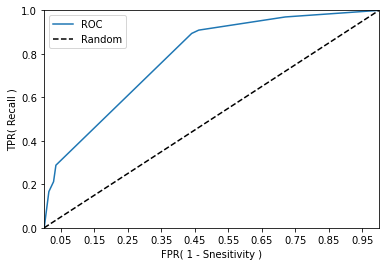

In [238]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_class_dte):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_dte)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_dte)

In [239]:
from sklearn.metrics import roc_auc_score

pred_proba_dte = dte_clf.predict_proba(X_test)[:, 1]
dte_roc_score = roc_auc_score(y_test, pred_proba_dte)
print('ROC AUC Score :', dte_roc_score)

ROC AUC Score : 0.7826870099597372


In [240]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, dte_pred = None, pred_proba_dte = None):
    confusion = confusion_matrix(y_test, dte_pred)
    accuracy = accuracy_score(y_test, dte_pred)
    precision = precision_score(y_test, dte_pred)
    recall = recall_score(y_test, dte_pred)
    f1 = f1_score(y_test, dte_pred)
    roc_auc = roc_auc_score(y_test, dte_pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_class_dte, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_class_dte)
        custom_predict = binarizer.transform(pred_proba_class_dte)
        print(f'임곗값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_class_dte):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_dte)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0 : threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0 : threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

get_clf_eval(y_test, dte_pred, pred_proba_dte)

오차행렬
[[138   5]
 [ 47  19]]
정확도 : 0.7512, 정밀도 : 0.7917, 재현율 : 0.2879, F1 : 0.4222, AUC : 0.6265


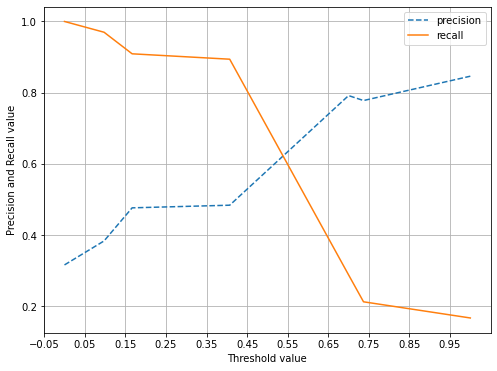

In [241]:
pred_proba_class_dte = dte_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_class_dte)

### Gini와 Entropy 비교

In [242]:
cart = pd.DataFrame([X.columns, gini,entropy]).T
cart.columns = ['feature','gini','entropy']
cart

,feature,gini,entropy
0,Pregnancies,0.023723,0.0
1,Glucose,0.489869,0.583336
2,BloodPressure,0.0,0.0
3,SkinThickness,0.04456,0.0
4,Insulin,0.0,0.0
5,BMI,0.203223,0.27446
6,DiabetesPedigreeFunction,0.0,0.091568
7,Age,0.238625,0.050636


### KNN

In [243]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

neigh_clf = KNeighborsClassifier(n_neighbors = 13)
neigh_clf.fit(X_train, y_train)
neigh_pred = neigh_clf.predict(X_test)
print("train score :", neigh_clf.score(X_train, y_train))
print("test score :", neigh_clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(neigh_clf, X_scaled, y, cv = 5)
print("cross validation score :", scores)
print("mean score :", scores.mean())

train score : 0.7814432989690722
test score : 0.7511961722488039
cross validation score : [0.73381295 0.74100719 0.77697842 0.79856115 0.73913043]
mean score : 0.757898029402565


In [244]:
from sklearn.metrics import roc_curve

pred_proba_class_neigh = neigh_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class_neigh)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_neigh)

neigh_thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index' : neigh_thr_index,
              'FPR' : fprs[neigh_thr_index],
              'TPR' : tprs[neigh_thr_index]})

[0.23076923 0.23076923 0.53846154 0.61538462 0.15384615 0.76923077
 0.46153846 0.38461538 0.23076923 0.53846154 0.         0.92307692
 0.30769231 0.         0.23076923 0.84615385 0.         0.07692308
 0.38461538 0.69230769 0.53846154 0.07692308 0.69230769 0.30769231
 0.         0.38461538 0.23076923 0.38461538 0.46153846 0.46153846
 0.30769231 0.38461538 0.53846154 0.15384615 0.30769231 0.23076923
 0.92307692 0.53846154 0.53846154 0.         0.15384615 0.
 0.46153846 0.46153846 0.07692308 0.23076923 0.38461538 0.46153846
 0.61538462 0.38461538 0.30769231 0.         0.38461538 0.61538462
 0.         0.23076923 0.         0.38461538 0.76923077 0.38461538
 0.76923077 0.61538462 0.38461538 0.         0.38461538 0.23076923
 0.84615385 0.30769231 0.76923077 0.46153846 0.         0.76923077
 0.46153846 0.23076923 0.         0.30769231 0.15384615 0.23076923
 0.         0.38461538 0.         0.07692308 0.         0.
 0.23076923 0.53846154 0.46153846 0.53846154 0.30769231 0.
 0.07692308 0.07692

,index,FPR,TPR
0,1,0.000000,0.030303
1,2,0.006993,0.106061
2,3,0.020979,0.227273
3,4,0.048951,0.303030
4,5,0.090909,0.378788
5,6,0.146853,0.530303
6,7,0.230769,0.636364
7,8,0.321678,0.787879
8,9,0.426573,0.878788
9,10,0.531469,0.939394


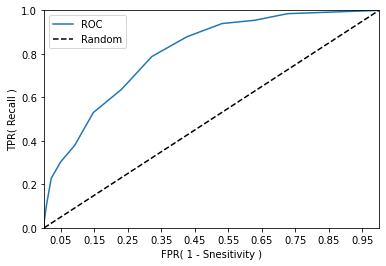

In [245]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_class_neigh):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_neigh)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_neigh)

In [246]:
from sklearn.metrics import roc_auc_score

pred_proba_neigh = neigh_clf.predict_proba(X_test)[:, 1]
neigh_roc_score = roc_auc_score(y_test, pred_proba_neigh)
print('ROC AUC Score :', neigh_roc_score)

ROC AUC Score : 0.8047255774528501


In [247]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, neigh_pred = None, pred_proba_neigh = None):
    confusion = confusion_matrix(y_test, neigh_pred)
    accuracy = accuracy_score(y_test, neigh_pred)
    precision = precision_score(y_test, neigh_pred)
    recall = recall_score(y_test, neigh_pred)
    f1 = f1_score(y_test, neigh_pred)
    roc_auc = roc_auc_score(y_test, neigh_pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_class_neigh, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_class_neigh)
        custom_predict = binarizer.transform(pred_proba_class_neigh)
        print(f'임곗값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_class_neigh):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_neigh)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0 : threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0 : threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

get_clf_eval(y_test, neigh_pred, pred_proba_neigh)

오차행렬
[[122  21]
 [ 31  35]]
정확도 : 0.7512, 정밀도 : 0.6250, 재현율 : 0.5303, F1 : 0.5738, AUC : 0.6917


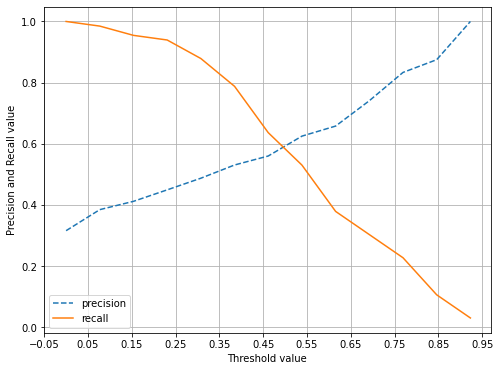

In [248]:
pred_proba_class_neigh = neigh_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_class_neigh)

### SVM

In [249]:
# SVM

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf = make_pipeline(StandardScaler(), SVC(gamma = 'auto', probability = True))
# 기본적으로 probability 파라미터는 False로 설정되기 때문에 svm.predict_proba() 함수를 실행하면 에러가 난다. 따라서 True로 명시해준다.
svm_clf.fit(X_scaled, y)
svm_pred = svm_clf.predict(X_test)
print("train score :", svm_clf.score(X_train, y_train))
print("test score :", svm_clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_clf, X_scaled, y, cv = 5)
print("cross validation score :", scores)
print("mean score :", scores.mean())

train score : 0.8123711340206186
test score : 0.84688995215311
cross validation score : [0.71223022 0.73381295 0.73381295 0.82733813 0.76086957]
mean score : 0.7536127619643416


In [250]:
from sklearn.metrics import roc_curve

pred_proba_class_svm = svm_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class_svm)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_svm)

svm_thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index' : svm_thr_index,
              'FPR' : fprs[svm_thr_index],
              'TPR' : tprs[svm_thr_index]})

[0.16609543 0.11239342 0.61272995 0.48386151 0.11734544 0.90151737
 0.35110997 0.30575579 0.47578288 0.18566763 0.09942488 0.94335997
 0.14722897 0.14534823 0.17405846 0.80896054 0.10314441 0.17142059
 0.20490397 0.55639102 0.84931786 0.0905178  0.80899393 0.17705679
 0.09685557 0.5        0.69594993 0.12491238 0.65425564 0.58433765
 0.26319822 0.23216378 0.17697016 0.14044489 0.23768353 0.44673976
 0.81930301 0.8089622  0.30298529 0.13363874 0.14075672 0.11078496
 0.28625983 0.20225159 0.13729543 0.17389251 0.21739788 0.18984617
 0.70820103 0.26899118 0.37738887 0.10633595 0.26891843 0.52549812
 0.09994911 0.13820771 0.07693102 0.29056409 0.72664446 0.55870036
 0.77782505 0.80902778 0.12212297 0.13231454 0.27984884 0.11850699
 0.88509879 0.51484059 0.88764039 0.17695497 0.15676291 0.80894206
 0.44802224 0.17153857 0.07039411 0.1543957  0.09842112 0.38205158
 0.09488754 0.43453079 0.07338639 0.1824096  0.13421456 0.1769751
 0.30036661 0.45142829 0.29915345 0.45974395 0.15420837 0.17698

,index,FPR,TPR
0,1,0.000000,0.015152
1,2,0.000000,0.151515
2,3,0.006993,0.151515
3,4,0.006993,0.181818
4,5,0.013986,0.181818
5,6,0.013986,0.196970
6,7,0.020979,0.196970
7,8,0.020979,0.363636
8,9,0.034965,0.363636
9,10,0.034965,0.545455


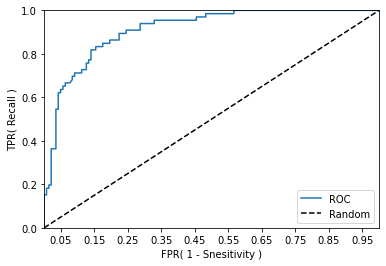

In [251]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_class_svm):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_svm)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_svm)

In [252]:
from sklearn.metrics import roc_auc_score

pred_proba_svm = svm_clf.predict_proba(X_test)[:, 1]
svm_roc_score = roc_auc_score(y_test, pred_proba_svm)
print('ROC AUC Score :', svm_roc_score)

ROC AUC Score : 0.9113689340962068


In [253]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, svm_pred = None, pred_proba_svm = None):
    confusion = confusion_matrix(y_test, svm_pred)
    accuracy = accuracy_score(y_test, svm_pred)
    precision = precision_score(y_test, svm_pred)
    recall = recall_score(y_test, svm_pred)
    f1 = f1_score(y_test, svm_pred)
    roc_auc = roc_auc_score(y_test, svm_pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_class_svm, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_class_svm)
        custom_predict = binarizer.transform(pred_proba_class_svm)
        print(f'임곗값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_class_svm):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_svm)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0 : threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0 : threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

get_clf_eval(y_test, svm_pred, pred_proba_svm)

오차행렬
[[131  12]
 [ 20  46]]
정확도 : 0.8469, 정밀도 : 0.7931, 재현율 : 0.6970, F1 : 0.7419, AUC : 0.8065


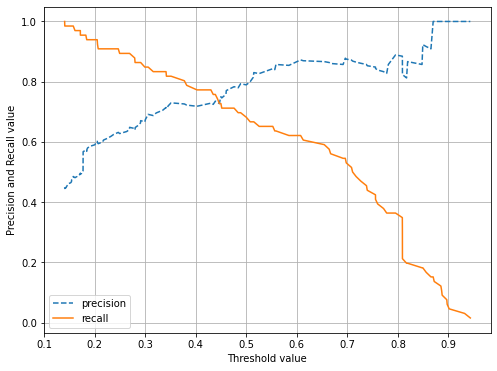

In [254]:
pred_proba_class_svm = svm_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_class_svm)

In [255]:
# 1개씩 제외한 피쳐 리스트 작성
col_list = []
for i in range(len(X_scaled.columns)):
    tmp_list = X_scaled.columns.tolist()
    tmp_list.pop(i)
    col_list.append(tmp_list)
print(col_list)

[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]


In [256]:
result = []
for i in range(len(col_list)):
    tmp_X_train = X_train[col_list[i]]
    tmp_X_test = X_test[col_list[i]]
    
    from sklearn import svm
    svm_clf = svm.SVC(gamma = 'auto', C = 0.09)
    svm_clf.fit(tmp_X_train, y_train)
    print("if ", X.columns[i], "is dropped")
    print("train score:", svm_clf.score(tmp_X_train, y_train))  
    print("test score:", svm_clf.score(tmp_X_test, y_test))  
    print("\n")
    result.append((X.columns[i], svm_clf.score(tmp_X_train, y_train)))

result

if  Pregnancies is dropped
train score: 0.709278350515464
test score: 0.7416267942583732


if  Glucose is dropped
train score: 0.6597938144329897
test score: 0.6842105263157895


if  BloodPressure is dropped
train score: 0.7505154639175258
test score: 0.7559808612440191


if  SkinThickness is dropped
train score: 0.7278350515463917
test score: 0.7368421052631579


if  Insulin is dropped
train score: 0.7381443298969073
test score: 0.7368421052631579


if  BMI is dropped
train score: 0.709278350515464
test score: 0.7320574162679426


if  DiabetesPedigreeFunction is dropped
train score: 0.7072164948453609
test score: 0.7272727272727273


if  Age is dropped
train score: 0.709278350515464
test score: 0.7368421052631579




[('Pregnancies', 0.709278350515464),
 ('Glucose', 0.6597938144329897),
 ('BloodPressure', 0.7505154639175258),
 ('SkinThickness', 0.7278350515463917),
 ('Insulin', 0.7381443298969073),
 ('BMI', 0.709278350515464),
 ('DiabetesPedigreeFunction', 0.7072164948453609),
 ('Age', 0.709278350515464)]

In [257]:
result = sorted(result, key = lambda x : x[1])
result

[('Glucose', 0.6597938144329897),
 ('DiabetesPedigreeFunction', 0.7072164948453609),
 ('Pregnancies', 0.709278350515464),
 ('BMI', 0.709278350515464),
 ('Age', 0.709278350515464),
 ('SkinThickness', 0.7278350515463917),
 ('Insulin', 0.7381443298969073),
 ('BloodPressure', 0.7505154639175258)]

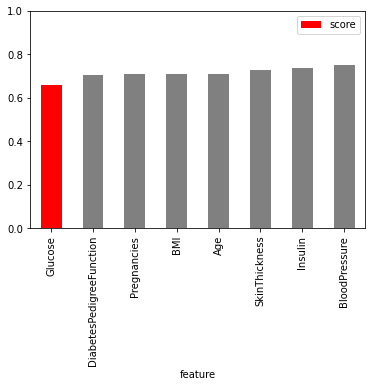

In [258]:
score_df = pd.DataFrame(result)
score_df.columns = ['feature','score']
score_df.plot.bar(x = 'feature', y = 'score', color = ['red','gray','gray','gray','gray','gray','gray', 'gray'])
plt.ylim(0, 1)
plt.show()

### Logistic Regression

In [259]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(random_state = 0)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print("train score :", lr_clf.score(X_train, y_train))
print("test score :", lr_clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_clf, X_scaled, y, cv = 5)
print("cross validation score :", scores)
print("mean score :", scores.mean())

train score : 0.7731958762886598
test score : 0.7703349282296651
cross validation score : [0.76978417 0.74820144 0.74820144 0.8057554  0.76811594]
mean score : 0.7680116776144301


In [260]:
from sklearn.metrics import roc_curve

pred_proba_class_lr = lr_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class_lr)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_lr)

lr_thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index' : lr_thr_index,
              'FPR' : fprs[lr_thr_index],
              'TPR' : tprs[lr_thr_index]})

[0.26315639 0.12683446 0.52266508 0.52161195 0.03077468 0.89947712
 0.19855944 0.28858834 0.15113024 0.58189371 0.08477387 0.97665432
 0.16138631 0.01342584 0.17183006 0.91966074 0.04986688 0.22092892
 0.22310654 0.50270835 0.80417237 0.0870787  0.881026   0.35564431
 0.03409426 0.72219424 0.49945194 0.11047114 0.54965473 0.71616848
 0.38803011 0.10272723 0.50439042 0.12529975 0.29107199 0.34334477
 0.91124108 0.77608719 0.56893883 0.03217432 0.09345401 0.03924988
 0.52919457 0.15450835 0.0930199  0.37584725 0.44745161 0.3571785
 0.86250504 0.40179845 0.36307984 0.02333264 0.43471632 0.89553975
 0.04934012 0.2515285  0.11789969 0.40447245 0.67833249 0.59722354
 0.78624984 0.97166902 0.22054235 0.05597927 0.40597254 0.1342218
 0.92692329 0.20994274 0.92976134 0.38648583 0.06673728 0.88879323
 0.78084175 0.20480633 0.06393387 0.08316007 0.07862233 0.39300791
 0.10582066 0.66450187 0.06428969 0.12139914 0.09561728 0.08342857
 0.54599538 0.75181668 0.42259253 0.37739701 0.16723317 0.080459

,index,FPR,TPR
0,1,0.006993,0.000000
1,2,0.006993,0.075758
2,3,0.013986,0.075758
3,4,0.013986,0.212121
4,5,0.020979,0.212121
...,...,...,...
58,59,0.615385,0.969697
59,60,0.615385,0.984848
60,61,0.818182,0.984848
61,62,0.818182,1.000000


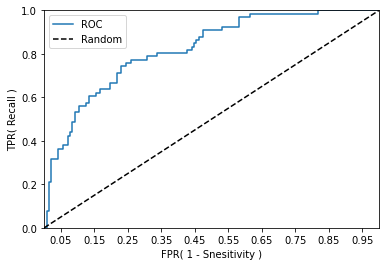

In [261]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_class_lr):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_lr)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_lr)

In [262]:
from sklearn.metrics import roc_auc_score

pred_proba_lr = lr_clf.predict_proba(X_test)[:, 1]
lr_roc_score = roc_auc_score(y_test, pred_proba_lr)
print('ROC AUC Score :', lr_roc_score)

ROC AUC Score : 0.8217842763297308


In [263]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, lr_pred = None, pred_proba_lr = None):
    confusion = confusion_matrix(y_test, lr_pred)
    accuracy = accuracy_score(y_test, lr_pred)
    precision = precision_score(y_test, lr_pred)
    recall = recall_score(y_test, lr_pred)
    f1 = f1_score(y_test, lr_pred)
    roc_auc = roc_auc_score(y_test, lr_pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_class_lr, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_class_lr)
        custom_predict = binarizer.transform(pred_proba_class_lr)
        print(f'임곗값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_class_lr):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_lr)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0 : threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0 : threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

get_clf_eval(y_test, lr_pred, pred_proba_lr)

오차행렬
[[121  22]
 [ 26  40]]
정확도 : 0.7703, 정밀도 : 0.6452, 재현율 : 0.6061, F1 : 0.6250, AUC : 0.7261


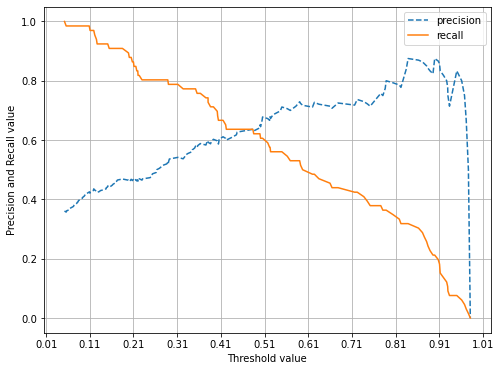

In [264]:
pred_proba_class_lr = lr_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_class_lr)

### Random Forest (n_estimaors = 10)

In [265]:
# Random Forest / n_estimators = 10

from sklearn.ensemble import RandomForestClassifier

rf10_clf = RandomForestClassifier(n_estimators = 10, random_state = 42, max_features = 4)
rf10_clf.fit(X_train, y_train)
rf10_pred = rf10_clf.predict(X_test)
print("train score :", rf10_clf.score(X_train, y_train))
print("test score :", rf10_clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf10_clf, X_scaled, y, cv = 5)
print("cross validation score :", scores)
print("mean score :", scores.mean())

train score : 0.9752577319587629
test score : 0.7655502392344498
cross validation score : [0.69064748 0.74100719 0.74100719 0.74820144 0.70289855]
mean score : 0.7247523720154311


In [266]:
from sklearn.metrics import roc_curve

pred_proba_class_rf10 = rf10_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class_rf10)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf10)

rf10_thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index' : rf10_thr_index,
              'FPR' : fprs[rf10_thr_index],
              'TPR' : tprs[rf10_thr_index]})

[0.2 0.1 0.5 0.7 0.1 0.9 0.6 0.2 0.6 0.6 0.  0.9 0.1 0.  0.1 0.7 0.  0.2
 0.1 0.7 1.  0.2 0.5 0.1 0.  0.6 0.7 0.  0.5 0.5 0.4 0.6 0.  0.  0.1 0.5
 1.  0.5 0.7 0.  0.  0.  0.4 0.2 0.2 0.2 0.2 0.2 0.6 0.4 0.6 0.1 0.4 0.2
 0.  0.5 0.  0.4 0.5 0.2 0.8 0.6 0.6 0.1 0.2 0.5 0.9 0.3 0.9 0.2 0.1 0.4
 0.5 0.  0.  0.1 0.  0.7 0.  0.2 0.2 0.1 0.1 0.  0.5 0.7 0.7 0.4 0.2 0.1
 0.3 0.2 0.  0.1 0.  0.2 0.5 0.1 0.  0.5 0.2 0.7 0.1 0.1 0.1 0.3 0.  0.
 0.8 0.1 0.1 0.8 0.5 0.4 0.  0.4 1.  0.1 0.  0.2 0.4 0.2 0.9 0.1 0.7 0.3
 0.1 0.2 0.  0.4 0.1 0.9 0.3 0.7 0.  0.6 0.7 0.2 0.1 0.9 0.3 0.  0.2 0.2
 0.  0.  1.  0.8 0.8 1.  1.  0.3 0.  0.4 0.  0.  0.7 0.5 0.1 0.7 0.9 0.9
 0.2 0.1 0.4 0.8 0.2 0.1 0.6 0.  0.8 0.5 0.  0.1 0.2 0.  0.  0.6 0.2 0.2
 0.  0.1 0.7 0.5 0.5 0.2 0.4 0.1 0.2 0.1 0.  0.1 0.7 0.1 0.5 0.  0.1 0.1
 0.  0.6 0.2 0.1 1.  0.  0.6 0.5 0.5 0.3 0.1]


,index,FPR,TPR
0,1,0.020979,0.060606
1,2,0.027972,0.181818
2,3,0.041958,0.257576
3,4,0.097902,0.378788
4,5,0.125874,0.530303
5,6,0.209790,0.666667
6,7,0.265734,0.757576
7,8,0.307692,0.787879
8,9,0.503497,0.863636
9,10,0.734266,0.954545


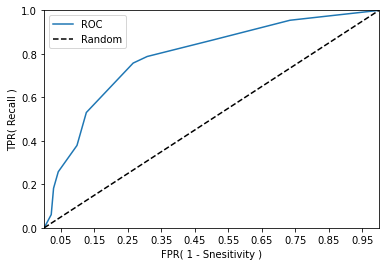

In [267]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_class_rf10):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf10)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_rf10)

In [268]:
from sklearn.metrics import roc_auc_score

pred_proba_rf10 = rf10_clf.predict_proba(X_test)[:, 1]
rf10_roc_score = roc_auc_score(y_test, pred_proba_rf10)
print('ROC AUC Score :', rf10_roc_score)

ROC AUC Score : 0.7887264250900614


In [269]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, rf10_pred = None, pred_proba_rf10 = None):
    confusion = confusion_matrix(y_test, rf10_pred)
    accuracy = accuracy_score(y_test, rf10_pred)
    precision = precision_score(y_test, rf10_pred)
    recall = recall_score(y_test, rf10_pred)
    f1 = f1_score(y_test, rf10_pred)
    roc_auc = roc_auc_score(y_test, rf10_pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_class_rf10, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_class_rf10)
        custom_predict = binarizer.transform(pred_proba_class_rf10)
        print(f'임곗값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_class_rf10):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_rf10)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0 : threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0 : threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

get_clf_eval(y_test, lr_pred, pred_proba_rf10)

오차행렬
[[121  22]
 [ 26  40]]
정확도 : 0.7703, 정밀도 : 0.6452, 재현율 : 0.6061, F1 : 0.6250, AUC : 0.7261


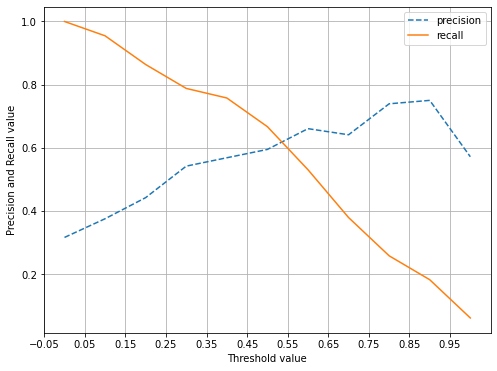

In [270]:
pred_proba_class_rf10 = rf10_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_class_rf10)

### Random Forest (n_estimators = 50)

In [271]:
# Random Forest / n_estimators = 50

from sklearn.ensemble import RandomForestClassifier

rf50_clf = RandomForestClassifier(n_estimators = 50, random_state = 42, max_features = 4)
rf50_clf.fit(X_train, y_train)
rf50_pred = rf50_clf.predict(X_test)
print("train score :", rf50_clf.score(X_train, y_train))
print("test score :", rf50_clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf50_clf, X_scaled, y, cv = 5)
print("cross validation score :", scores)
print("mean score :", scores.mean())

train score : 1.0
test score : 0.7799043062200957
cross validation score : [0.74100719 0.72661871 0.76258993 0.79136691 0.7173913 ]
mean score : 0.7477948076321551


In [272]:
from sklearn.metrics import roc_curve

pred_proba_class_rf50 = rf50_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class_rf50)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf50)

rf50_thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index' : rf50_thr_index,
              'FPR' : fprs[rf50_thr_index],
              'TPR' : tprs[rf50_thr_index]})

[0.26 0.12 0.48 0.5  0.14 0.86 0.66 0.24 0.58 0.58 0.   0.96 0.14 0.
 0.06 0.66 0.04 0.16 0.08 0.52 0.76 0.16 0.5  0.1  0.   0.5  0.56 0.08
 0.72 0.54 0.48 0.5  0.24 0.1  0.14 0.46 0.9  0.58 0.66 0.02 0.08 0.02
 0.42 0.18 0.12 0.24 0.4  0.46 0.44 0.38 0.5  0.04 0.42 0.34 0.1  0.2
 0.1  0.34 0.54 0.3  0.88 0.7  0.44 0.04 0.3  0.38 0.92 0.42 0.98 0.2
 0.14 0.6  0.64 0.02 0.04 0.08 0.04 0.48 0.02 0.32 0.06 0.06 0.06 0.1
 0.46 0.64 0.52 0.4  0.24 0.08 0.16 0.14 0.02 0.12 0.02 0.1  0.5  0.14
 0.   0.52 0.2  0.62 0.1  0.34 0.04 0.34 0.   0.   0.68 0.08 0.12 0.66
 0.62 0.3  0.16 0.52 0.96 0.36 0.02 0.44 0.36 0.38 0.88 0.2  0.62 0.28
 0.12 0.26 0.02 0.56 0.2  0.6  0.56 0.82 0.04 0.46 0.64 0.2  0.08 0.64
 0.16 0.   0.38 0.14 0.   0.1  0.92 0.78 0.88 0.88 0.92 0.24 0.06 0.56
 0.08 0.06 0.78 0.38 0.16 0.74 0.84 0.8  0.1  0.06 0.3  0.9  0.18 0.4
 0.76 0.   0.8  0.64 0.06 0.18 0.1  0.   0.1  0.52 0.18 0.08 0.02 0.04
 0.74 0.72 0.58 0.18 0.18 0.34 0.18 0.08 0.   0.08 0.76 0.04 0.44 0.
 0.16 0.04 0.0

,index,FPR,TPR
0,1,0.000000,0.015152
1,2,0.000000,0.045455
2,3,0.006993,0.045455
3,4,0.013986,0.075758
4,5,0.013986,0.106061
5,6,0.027972,0.136364
6,7,0.027972,0.181818
7,8,0.027972,0.212121
8,9,0.034965,0.227273
9,10,0.034965,0.272727


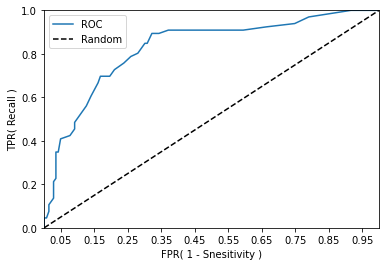

In [273]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_class_rf50):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf50)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_rf50)

In [274]:
from sklearn.metrics import roc_auc_score

pred_proba_rf50 = rf50_clf.predict_proba(X_test)[:, 1]
rf50_roc_score = roc_auc_score(y_test, pred_proba_rf50)
print('ROC AUC Score :', rf50_roc_score)

ROC AUC Score : 0.8276117821572366


In [275]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, rf50_pred = None, pred_proba_rf50 = None):
    confusion = confusion_matrix(y_test, rf50_pred)
    accuracy = accuracy_score(y_test, rf50_pred)
    precision = precision_score(y_test, rf50_pred)
    recall = recall_score(y_test, rf50_pred)
    f1 = f1_score(y_test, rf50_pred)
    roc_auc = roc_auc_score(y_test, rf50_pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_class_rf50, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_class_rf50)
        custom_predict = binarizer.transform(pred_proba_class_rf50)
        print(f'임곗값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_class_rf50):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_rf50)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0 : threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0 : threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

get_clf_eval(y_test, lr_pred, pred_proba_rf50)

오차행렬
[[121  22]
 [ 26  40]]
정확도 : 0.7703, 정밀도 : 0.6452, 재현율 : 0.6061, F1 : 0.6250, AUC : 0.7261


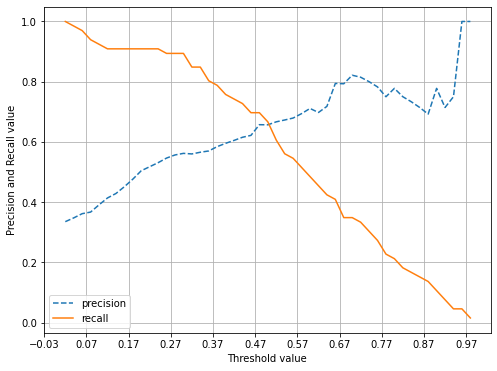

In [276]:
pred_proba_class_rf50 = rf50_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_class_rf50)

### Random Forest (n_estimaors = 100)

In [277]:
# Random Forest / n_estimators = 100

from sklearn.ensemble import RandomForestClassifier

rf100_clf = RandomForestClassifier(n_estimators = 100, random_state = 42, max_features = 4)
rf100_clf.fit(X_train, y_train)
rf100_pred = rf100_clf.predict(X_test)
print("train score :", rf100_clf.score(X_train, y_train))
print("test score :", rf100_clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf100_clf, X_scaled, y, cv = 5)
print("cross validation score :", scores)
print("mean score :", scores.mean())

train score : 1.0
test score : 0.7942583732057417
cross validation score : [0.73381295 0.72661871 0.74100719 0.79136691 0.73188406]
mean score : 0.7449379626733397


In [278]:
from sklearn.metrics import roc_curve

pred_proba_class_rf100 = rf100_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class_rf100)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf100)

rf100_thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index' : rf100_thr_index,
              'FPR' : fprs[rf100_thr_index],
              'TPR' : tprs[rf100_thr_index]})

[0.22 0.12 0.52 0.47 0.12 0.88 0.63 0.2  0.56 0.56 0.02 0.96 0.21 0.
 0.07 0.7  0.04 0.15 0.07 0.51 0.78 0.15 0.46 0.1  0.   0.52 0.55 0.16
 0.72 0.45 0.43 0.39 0.22 0.07 0.19 0.48 0.91 0.59 0.65 0.01 0.07 0.01
 0.38 0.13 0.24 0.24 0.41 0.46 0.41 0.41 0.52 0.03 0.5  0.39 0.08 0.21
 0.08 0.32 0.46 0.33 0.82 0.72 0.47 0.03 0.31 0.29 0.93 0.44 0.93 0.21
 0.1  0.67 0.6  0.05 0.02 0.05 0.06 0.46 0.08 0.34 0.07 0.05 0.1  0.11
 0.54 0.63 0.5  0.44 0.23 0.09 0.13 0.12 0.02 0.13 0.05 0.14 0.48 0.15
 0.   0.51 0.19 0.55 0.1  0.39 0.04 0.31 0.01 0.   0.6  0.05 0.19 0.66
 0.6  0.4  0.16 0.49 0.89 0.37 0.02 0.45 0.44 0.38 0.92 0.16 0.68 0.29
 0.1  0.3  0.01 0.56 0.29 0.63 0.59 0.78 0.06 0.4  0.64 0.18 0.07 0.6
 0.19 0.02 0.38 0.15 0.01 0.06 0.92 0.79 0.86 0.87 0.85 0.22 0.05 0.58
 0.07 0.1  0.81 0.45 0.12 0.74 0.85 0.73 0.13 0.06 0.27 0.89 0.22 0.32
 0.77 0.01 0.86 0.59 0.06 0.18 0.12 0.   0.15 0.49 0.21 0.12 0.01 0.03
 0.71 0.73 0.46 0.25 0.12 0.36 0.19 0.15 0.   0.13 0.78 0.06 0.41 0.
 0.1  0.02 

,index,FPR,TPR
0,1,0.000000,0.015152
1,2,0.006993,0.045455
2,3,0.006993,0.075758
3,4,0.006993,0.090909
4,5,0.006993,0.121212
...,...,...,...
63,64,0.762238,0.939394
64,65,0.818182,1.000000
65,66,0.832168,1.000000
66,67,0.853147,1.000000


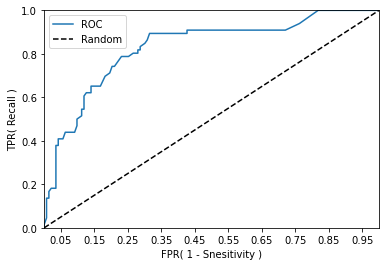

In [279]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_class_rf100):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf100)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_rf100)

In [280]:
from sklearn.metrics import roc_auc_score

pred_proba_rf100 = rf100_clf.predict_proba(X_test)[:, 1]
rf100_roc_score = roc_auc_score(y_test, pred_proba_rf100)
print('ROC AUC Score :', rf100_roc_score)

ROC AUC Score : 0.8298368298368298


In [281]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, rf100_pred = None, pred_proba_rf100 = None):
    confusion = confusion_matrix(y_test, rf100_pred)
    accuracy = accuracy_score(y_test, rf100_pred)
    precision = precision_score(y_test, rf100_pred)
    recall = recall_score(y_test, rf100_pred)
    f1 = f1_score(y_test, rf100_pred)
    roc_auc = roc_auc_score(y_test, rf100_pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_class_rf100, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_class_rf100)
        custom_predict = binarizer.transform(pred_proba_class_rf100)
        print(f'임곗값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_class_rf100):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_rf100)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0 : threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0 : threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

get_clf_eval(y_test, lr_pred, pred_proba_rf100)

오차행렬
[[121  22]
 [ 26  40]]
정확도 : 0.7703, 정밀도 : 0.6452, 재현율 : 0.6061, F1 : 0.6250, AUC : 0.7261


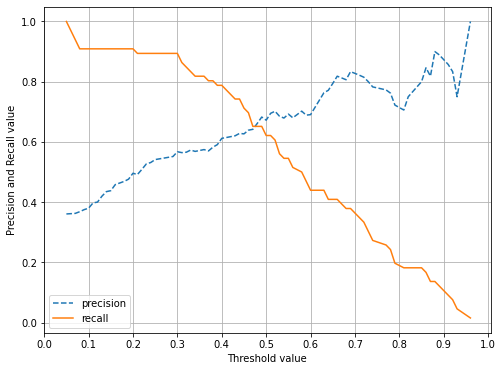

In [282]:
pred_proba_class_rf100 = rf100_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_class_rf100)

### Random Forest (n_estimaors = 150)

In [283]:
# Random Forest / n_estimators = 150

from sklearn.ensemble import RandomForestClassifier

rf150_clf = RandomForestClassifier(n_estimators = 150, random_state = 42, max_features = 4)
rf150_clf.fit(X_train, y_train)
rf150_pred = rf150_clf.predict(X_test)
print("train score :", rf150_clf.score(X_train, y_train))
print("test score :", rf150_clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf150_clf, X_scaled, y, cv = 5)
print("cross validation score :", scores)
print("mean score :", scores.mean())

train score : 1.0
test score : 0.784688995215311
cross validation score : [0.73381295 0.73381295 0.73381295 0.8057554  0.73913043]
mean score : 0.749264935877385


In [284]:
from sklearn.metrics import roc_curve

pred_proba_class_rf150 = rf150_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class_rf150)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf150)

rf150_thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index' : rf150_thr_index,
              'FPR' : fprs[rf150_thr_index],
              'TPR' : tprs[rf150_thr_index]})

[0.25333333 0.12       0.52666667 0.47333333 0.12       0.88666667
 0.58       0.18666667 0.5        0.58666667 0.01333333 0.95333333
 0.20666667 0.         0.07333333 0.68666667 0.04666667 0.19333333
 0.1        0.57333333 0.74       0.14666667 0.49333333 0.1
 0.         0.55333333 0.54       0.14       0.74       0.44
 0.37333333 0.36       0.24666667 0.06       0.18       0.44666667
 0.9        0.61333333 0.66       0.00666667 0.06       0.00666667
 0.34       0.16       0.26       0.26666667 0.38       0.48
 0.40666667 0.42       0.50666667 0.02       0.5        0.37333333
 0.1        0.20666667 0.07333333 0.34666667 0.48666667 0.34666667
 0.78       0.65333333 0.48       0.02666667 0.3        0.28666667
 0.92666667 0.44       0.89333333 0.23333333 0.08       0.64666667
 0.56       0.06666667 0.01333333 0.06666667 0.05333333 0.46
 0.06666667 0.36       0.07333333 0.06       0.07333333 0.13333333
 0.54       0.7        0.55333333 0.48666667 0.24       0.07333333
 0.10666667 0.12    

,index,FPR,TPR
0,1,0.000000,0.015152
1,2,0.006993,0.015152
2,3,0.006993,0.045455
3,4,0.006993,0.075758
4,5,0.006993,0.106061
...,...,...,...
75,76,0.839161,1.000000
76,77,0.867133,1.000000
77,78,0.937063,1.000000
78,79,0.972028,1.000000


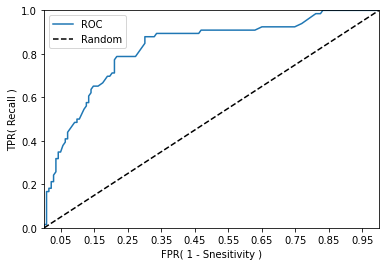

In [285]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_class_rf150):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf150)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_rf150)

In [286]:
from sklearn.metrics import roc_auc_score

pred_proba_rf150 = rf150_clf.predict_proba(X_test)[:, 1]
rf150_roc_score = roc_auc_score(y_test, pred_proba_rf150)
print('ROC AUC Score :', rf150_roc_score)

ROC AUC Score : 0.8281945327399873


In [287]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, rf150_pred = None, pred_proba_rf150 = None):
    confusion = confusion_matrix(y_test, rf150_pred)
    accuracy = accuracy_score(y_test, rf150_pred)
    precision = precision_score(y_test, rf150_pred)
    recall = recall_score(y_test, rf150_pred)
    f1 = f1_score(y_test, rf150_pred)
    roc_auc = roc_auc_score(y_test, rf150_pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_class_rf150, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_class_rf150)
        custom_predict = binarizer.transform(pred_proba_class_rf150)
        print(f'임곗값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_class_rf150):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_rf150)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0 : threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0 : threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

get_clf_eval(y_test, lr_pred, pred_proba_rf150)

오차행렬
[[121  22]
 [ 26  40]]
정확도 : 0.7703, 정밀도 : 0.6452, 재현율 : 0.6061, F1 : 0.6250, AUC : 0.7261


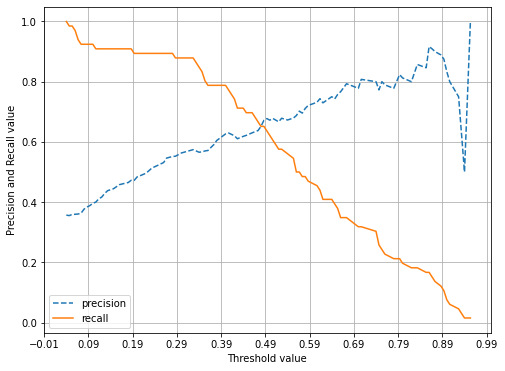

In [288]:
pred_proba_class_rf150 = rf150_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_class_rf150)

### Random Forest (n_estimators = 180)

In [289]:
# Random Forest / n_estimators = 180

from sklearn.ensemble import RandomForestClassifier

rf180_clf = RandomForestClassifier(n_estimators = 180, random_state = 42, max_features = 4)
rf180_clf.fit(X_train, y_train)
rf180_pred = rf180_clf.predict(X_test)
print("train score :", rf180_clf.score(X_train, y_train))
print("test score :", rf180_clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf180_clf, X_scaled, y, cv = 5)
print("cross validation score :", scores)
print("mean score :", scores.mean())

train score : 1.0
test score : 0.7894736842105263
cross validation score : [0.73381295 0.72661871 0.74100719 0.81294964 0.74637681]
mean score : 0.7521530601605673


In [290]:
from sklearn.metrics import roc_curve

pred_proba_class_rf180 = rf180_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class_rf180)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf180)

rf180_thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index' : rf180_thr_index,
              'FPR' : fprs[rf180_thr_index],
              'TPR' : tprs[rf180_thr_index]})

[0.25       0.13333333 0.53888889 0.47777778 0.11666667 0.88333333
 0.59444444 0.19444444 0.48333333 0.59444444 0.01111111 0.94444444
 0.2        0.         0.07777778 0.69444444 0.05555556 0.18888889
 0.09444444 0.56666667 0.73888889 0.13333333 0.49444444 0.09444444
 0.         0.56666667 0.52222222 0.12777778 0.71111111 0.44444444
 0.39444444 0.34444444 0.25555556 0.06111111 0.18888889 0.46111111
 0.88888889 0.60555556 0.67777778 0.00555556 0.06111111 0.01111111
 0.34444444 0.16111111 0.25       0.25555556 0.36666667 0.47222222
 0.43888889 0.43888889 0.51666667 0.01666667 0.49444444 0.37777778
 0.09444444 0.22777778 0.06111111 0.36666667 0.50555556 0.36666667
 0.77222222 0.65       0.47222222 0.02222222 0.31111111 0.29444444
 0.93333333 0.43888889 0.89444444 0.23888889 0.07222222 0.62777778
 0.53888889 0.06111111 0.01111111 0.08888889 0.06666667 0.44444444
 0.06666667 0.38333333 0.07222222 0.05555556 0.06666667 0.14444444
 0.52777778 0.67777778 0.56111111 0.49444444 0.23333333 0.0833

,index,FPR,TPR
0,1,0.000000,0.015152
1,2,0.006993,0.015152
2,3,0.006993,0.045455
3,4,0.006993,0.075758
4,5,0.006993,0.121212
...,...,...,...
79,80,0.832168,1.000000
80,81,0.860140,1.000000
81,82,0.888112,1.000000
82,83,0.944056,1.000000


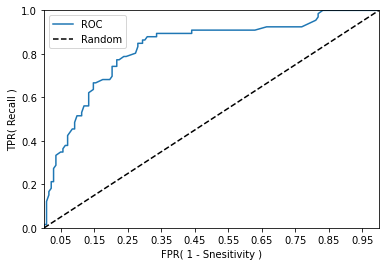

In [291]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_class_rf180):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf180)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_rf180)

In [292]:
from sklearn.metrics import roc_auc_score

pred_proba_rf180 = rf180_clf.predict_proba(X_test)[:, 1]
rf180_roc_score = roc_auc_score(y_test, pred_proba_rf180)
print('ROC AUC Score :', rf180_roc_score)

ROC AUC Score : 0.8276117821572366


In [293]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, rf180_pred = None, pred_proba_rf180 = None):
    confusion = confusion_matrix(y_test, rf180_pred)
    accuracy = accuracy_score(y_test, rf180_pred)
    precision = precision_score(y_test, rf180_pred)
    recall = recall_score(y_test, rf180_pred)
    f1 = f1_score(y_test, rf180_pred)
    roc_auc = roc_auc_score(y_test, rf180_pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_class_rf180, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_class_rf180)
        custom_predict = binarizer.transform(pred_proba_class_rf180)
        print(f'임곗값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_class_rf180):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_rf180)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0 : threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0 : threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

get_clf_eval(y_test, lr_pred, pred_proba_rf180)

오차행렬
[[121  22]
 [ 26  40]]
정확도 : 0.7703, 정밀도 : 0.6452, 재현율 : 0.6061, F1 : 0.6250, AUC : 0.7261


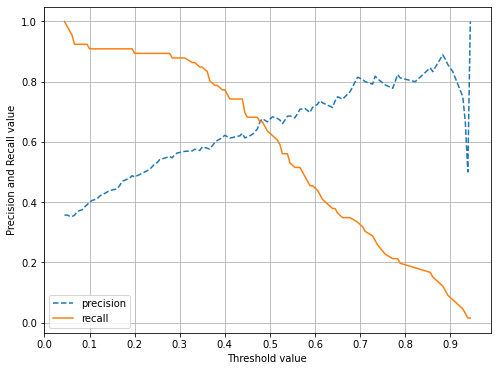

In [294]:
pred_proba_class_rf180 = rf180_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_class_rf180)

### Random Forest (n_estimaors = 200)

In [295]:
# Random Forest / n_estimators = 200

from sklearn.ensemble import RandomForestClassifier

rf200_clf = RandomForestClassifier(n_estimators = 200, random_state = 42, max_features = 4)
rf200_clf.fit(X_train, y_train)
rf200_pred = rf200_clf.predict(X_test)
print("train score :", rf200_clf.score(X_train, y_train))
print("test score :", rf200_clf.score(X_test, y_test))

from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf200_clf, X_scaled, y, cv = 5)
print("cross validation score :", scores)
print("mean score :", scores.mean())

train score : 1.0
test score : 0.784688995215311
cross validation score : [0.72661871 0.71942446 0.74100719 0.8057554  0.73913043]
mean score : 0.7463872380356584


In [296]:
from sklearn.metrics import roc_curve

pred_proba_class_rf200 = rf200_clf.predict_proba(X_test)[:, 1]
print(pred_proba_class_rf200)

fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf200)

rf200_thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index' : rf200_thr_index,
              'FPR' : fprs[rf200_thr_index],
              'TPR' : tprs[rf200_thr_index]})

[0.26  0.13  0.555 0.485 0.135 0.89  0.6   0.185 0.48  0.605 0.01  0.945
 0.21  0.    0.075 0.705 0.05  0.175 0.11  0.56  0.74  0.125 0.495 0.095
 0.    0.57  0.535 0.125 0.7   0.445 0.41  0.36  0.26  0.065 0.2   0.46
 0.885 0.59  0.675 0.005 0.06  0.01  0.365 0.18  0.23  0.25  0.375 0.47
 0.435 0.445 0.51  0.015 0.49  0.375 0.1   0.225 0.055 0.375 0.51  0.38
 0.77  0.64  0.475 0.02  0.31  0.295 0.935 0.43  0.89  0.25  0.065 0.62
 0.555 0.065 0.01  0.095 0.08  0.46  0.065 0.385 0.075 0.05  0.075 0.145
 0.515 0.68  0.545 0.505 0.225 0.075 0.145 0.115 0.01  0.105 0.095 0.08
 0.48  0.18  0.    0.555 0.22  0.52  0.09  0.38  0.055 0.3   0.005 0.
 0.65  0.04  0.18  0.685 0.625 0.4   0.14  0.46  0.81  0.42  0.01  0.4
 0.405 0.445 0.89  0.175 0.64  0.265 0.16  0.3   0.01  0.54  0.215 0.6
 0.585 0.775 0.06  0.375 0.65  0.17  0.065 0.55  0.21  0.035 0.325 0.155
 0.015 0.065 0.925 0.745 0.87  0.87  0.825 0.205 0.04  0.56  0.085 0.13
 0.735 0.44  0.1   0.64  0.86  0.72  0.11  0.055 0.27  0.905 0.2

,index,FPR,TPR
0,1,0.006993,0.015152
1,2,0.006993,0.060606
2,3,0.006993,0.106061
3,4,0.006993,0.121212
4,5,0.013986,0.136364
...,...,...,...
86,87,0.867133,1.000000
87,88,0.895105,1.000000
88,89,0.951049,1.000000
89,90,0.972028,1.000000


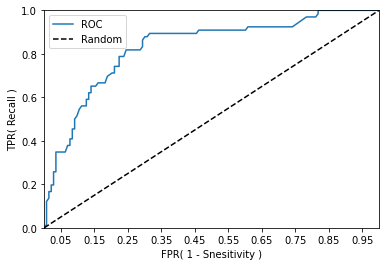

In [297]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_class_rf200):
    # 임곗값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_class_rf200)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class_rf200)

In [298]:
from sklearn.metrics import roc_auc_score

pred_proba_rf200 = rf200_clf.predict_proba(X_test)[:, 1]
rf200_roc_score = roc_auc_score(y_test, pred_proba_rf200)
print('ROC AUC Score :', rf200_roc_score)

ROC AUC Score : 0.8297838525111253


In [299]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, rf200_pred = None, pred_proba_rf200 = None):
    confusion = confusion_matrix(y_test, rf200_pred)
    accuracy = accuracy_score(y_test, rf200_pred)
    precision = precision_score(y_test, rf200_pred)
    recall = recall_score(y_test, rf200_pred)
    f1 = f1_score(y_test, rf200_pred)
    roc_auc = roc_auc_score(y_test, rf200_pred)
    
    print('오차행렬')
    print(confusion)
    print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율 : {2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'
          .format(accuracy, precision, recall, f1, roc_auc))
    
# get_eval_by_threshold()
def get_eval_by_threshold(y_test, pred_proba_class_rf200, thresholds):
    # thresholds list 객체 내의 값을 차례로 iteration하면서 evaluation 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_class_rf200)
        custom_predict = binarizer.transform(pred_proba_class_rf200)
        print(f'임곗값 : {custom_threshold}')
        get_clf_eval(y_test, custom_predict)

# precision_recall_curve_plot()
def precision_recall_curve_plot(y_test, pred_proba_class_rf200):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_rf200)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행, 정밀도는 점선으로 표시
    plt.figure(figsize = (8, 6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0 : threshold_boundary], linestyle = '--', label = 'precision')
    plt.plot(thresholds, recalls[0 : threshold_boundary], label = 'recall')
    
    # threshold 값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # X, Y축 label과 legend, grid 설정
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall value')
    plt.legend()
    plt.grid()

get_clf_eval(y_test, lr_pred, pred_proba_rf200)

오차행렬
[[121  22]
 [ 26  40]]
정확도 : 0.7703, 정밀도 : 0.6452, 재현율 : 0.6061, F1 : 0.6250, AUC : 0.7261


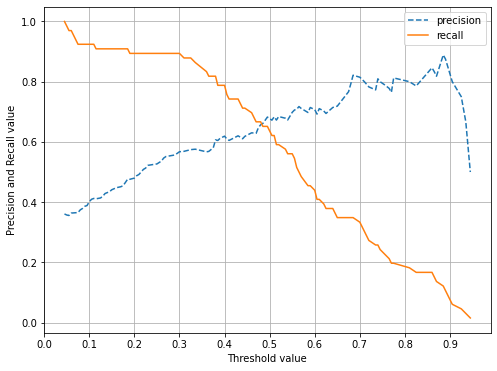

In [300]:
pred_proba_class_rf200 = rf200_clf.predict_proba(X_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_class_rf200)

In [301]:
# - 소수점 3번째자리 반올림
# Decision Tree / Gini - 73.05%
# Decision Tree / Entropy - 73.34%
# KNN - 75.79%
# SVM - 75.36%
# Logistic Regression - 76.80%
# Random Forest(Tree - 10) - 72.48%
# Random Forest(Tree - 50) - 74.78%
# Random Forest(Tree - 100) - 74.49%
# Random Forest(Tree - 150) - 74.93%
# Random Forest(Tree - 180) - 75.22%
# Random Forest(Tree - 200) - 74.64%